In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/framer tweet /Tweets (1).csv', encoding = 'Latin-1')
df.head()

,Datetime,Tweet Id,Text,Username
0,2020-11-05 23:34:24+00:00,1.320000e+18,"Pakistani Army Extracts From Its Own Farmers, ...",HindiNewsLates1
1,2020-11-05 22:09:16+00:00,1.320000e+18,{editor} Non-stun export ban sparks mass farme...,ukagri
2,2020-11-05 21:57:50+00:00,1.320000e+18,PTI itself kept Islamabad hijacked for months ...,Gulalai_Ismail
3,2020-11-05 21:54:22+00:00,1.320000e+18,Malik Ishfaq Langrial passes away after Punjab...,AanuJanu1
4,2020-11-05 21:30:24+00:00,1.320000e+18,"Farmers postpone protest after baton-charge, a...",RelationsState


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17165 entries, 0 to 17164
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  17165 non-null  object 
 1   Tweet Id  17165 non-null  float64
 2   Text      17165 non-null  object 
 3   Username  17165 non-null  object 
dtypes: float64(1), object(3)
memory usage: 536.5+ KB


In [5]:
df.shape

(17165, 4)

In [6]:
df1 = df[['Text']].head(5000)

In [7]:
#drop duplicate tweets and Retweets(RT)
df1.drop_duplicates(subset='Text',inplace=True)
# bit=bit[bit.text.str.startswith('RT')]

wantedRows = df1[df1['Text'].str.split().str.len()==1].index 
df1 =  df1.drop(wantedRows, axis = 0)
df1.head

<bound method NDFrame.head of                                                    Text
0     Pakistani Army Extracts From Its Own Farmers, ...
1     {editor} Non-stun export ban sparks mass farme...
2     PTI itself kept Islamabad hijacked for months ...
3     Malik Ishfaq Langrial passes away after Punjab...
4     Farmers postpone protest after baton-charge, a...
...                                                 ...
4995  With the farmers protests going on, Iâve bee...
4996  on a real note, there are still loads of ppl w...
4997  Yes and the fact that they ate calling a peace...
4998  @narendramodi @PMOIndia @AmitShah why the Govâ...
4999  Paji please share the link again  to sign so w...

[4998 rows x 1 columns]>

In [8]:

df1['Text'].fillna("", inplace=True)
# final_data['keyword'].fillna("", inplace=True)
df1.isnull().sum()

Text    0
dtype: int64

In [9]:
## FOR STOP WORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# FOR LEMMATIZATION
#from nltk.stem import WordNetLemmatizer
#lemmatizer = WordNetLemmatizer()


# FOR STEMMING
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
!pip install twython

In [12]:
def data_preprocessing(raw_text):

    #Data Cleansing
    sentence = re.sub(r'[^\w\s]',' ',raw_text )


    #Removing numbers
    sentence = re.sub(r'[0-9]', '', sentence)
    
    http= re.sub(r'https.*$','',sentence)
    #Tokenization
    words = nltk.word_tokenize(http)

    #Lowercase
    for word in words:
            word.lower()
    
    #Stop words removal
    words = [w for w in words if not w in stop_words]
    
     #stemming
    words = [stemmer.stem(w) for w in words]
    

    
    return  words 

In [13]:

df1.Text = df1.Text.apply(data_preprocessing)

In [14]:
df1.Text

0       [pakistani, armi, extract, from, it, own, farm...
1       [editor, non, stun, export, ban, spark, mass, ...
2       [pti, kept, islamabad, hijack, month, attempt,...
3       [malik, ishfaq, langrial, pass, away, punjab, ...
4       [farmer, postpon, protest, baton, charg, arres...
                              ...                        
4995    [with, farmer, protest, go, Iâ, influenc, blog...
4996    [real, note, still, load, ppl, donâ, understan...
4997    [ye, fact, ate, call, peac, farmer, protest, A...
4998    [narendramodi, pmoindia, amitshah, govâ, creat...
4999    [paji, pleas, share, link, sign, complet, lack...
Name: Text, Length: 4998, dtype: object

In [15]:
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))

string_list = []
for i in df1.Text :
    string = listToString(i)
    string_list.append(string)
    
# storing the string list created into the dataframe
df1.Text = string_list

In [16]:
df1.Text

0       pakistani armi extract from it own farmer farm...
1       editor non stun export ban spark mass farmer p...
2       pti kept islamabad hijack month attempt throw ...
3       malik ishfaq langrial pass away punjab polic t...
4       farmer postpon protest baton charg arrest â Â ...
                              ...                        
4995    with farmer protest go Iâ influenc blog piec c...
4996    real note still load ppl donâ understand magni...
4997    ye fact ate call peac farmer protest A khalist...
4998    narendramodi pmoindia amitshah govâ creat host...
4999    paji pleas share link sign complet lack peopl ...
Name: Text, Length: 4998, dtype: object

In [17]:
new_df= df1
new_df

,Text
0,pakistani armi extract from it own farmer farm...
1,editor non stun export ban spark mass farmer p...
2,pti kept islamabad hijack month attempt throw ...
3,malik ishfaq langrial pass away punjab polic t...
4,farmer postpon protest baton charg arrest â Â ...
...,...
4995,with farmer protest go Iâ influenc blog piec c...
4996,real note still load ppl donâ understand magni...
4997,ye fact ate call peac farmer protest A khalist...
4998,narendramodi pmoindia amitshah govâ creat host...


In [18]:
!pip install wordcloud

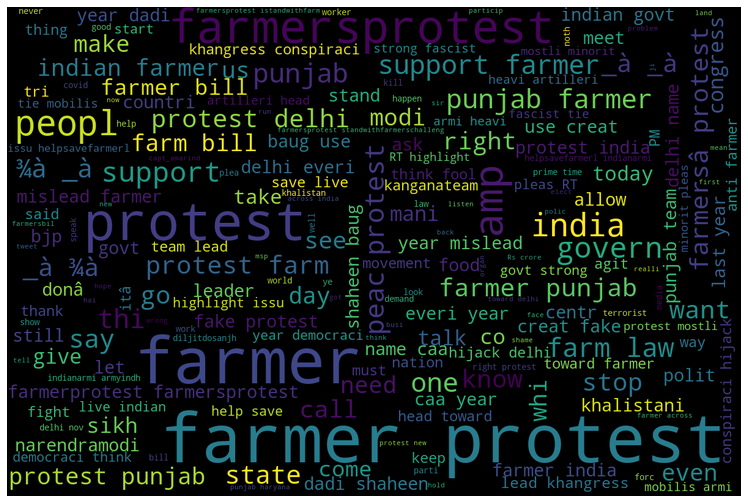

In [19]:
#making Word Cloud of all tweets
all_words = ' '.join([text for text in new_df['Text']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=1200, height=800,background_color ='black', 
                      random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(15, 9)) 
plt.imshow(wordcloud, interpolation="blackman") 
plt.axis('off') 
plt.show()

In [20]:
a = new_df['Text']

In [21]:
from textblob import TextBlob


def find_polarity(txt):
    blob = TextBlob(txt)
    return blob.sentiment.polarity

# new_data = a.apply(find_polarity)
# new_data
new_df['polarity'] = a.apply(lambda x: find_polarity(x))

In [22]:
new_df

,Text,polarity
0,pakistani armi extract from it own farmer farm...,0.600000
1,editor non stun export ban spark mass farmer p...,0.000000
2,pti kept islamabad hijack month attempt throw ...,0.285714
3,malik ishfaq langrial pass away punjab polic t...,0.285714
4,farmer postpon protest baton charg arrest â Â ...,-0.050000
...,...,...
4995,with farmer protest go Iâ influenc blog piec c...,-0.088068
4996,real note still load ppl donâ understand magni...,0.116667
4997,ye fact ate call peac farmer protest A khalist...,0.375000
4998,narendramodi pmoindia amitshah govâ creat host...,0.000000


In [23]:
# getting sentiments classes
def find_sentiment(txt):
        if find_polarity(txt) > 0.0 and find_polarity(txt) <= 1:
            return 'Postitive'
       
        elif find_polarity(txt) < 0  and find_polarity(txt) >= -1:
            return 'Negative'
       
        elif find_polarity(txt) == 0.0:
            return 'Neutral'
        else:
            pass

In [24]:

new_df['sentiments'] = new_df['Text'].apply(find_sentiment) #calling find sentiment function
new_df

,Text,polarity,sentiments
0,pakistani armi extract from it own farmer farm...,0.600000,Postitive
1,editor non stun export ban spark mass farmer p...,0.000000,Neutral
2,pti kept islamabad hijack month attempt throw ...,0.285714,Postitive
3,malik ishfaq langrial pass away punjab polic t...,0.285714,Postitive
4,farmer postpon protest baton charg arrest â Â ...,-0.050000,Negative
...,...,...,...
4995,with farmer protest go Iâ influenc blog piec c...,-0.088068,Negative
4996,real note still load ppl donâ understand magni...,0.116667,Postitive
4997,ye fact ate call peac farmer protest A khalist...,0.375000,Postitive
4998,narendramodi pmoindia amitshah govâ creat host...,0.000000,Neutral


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


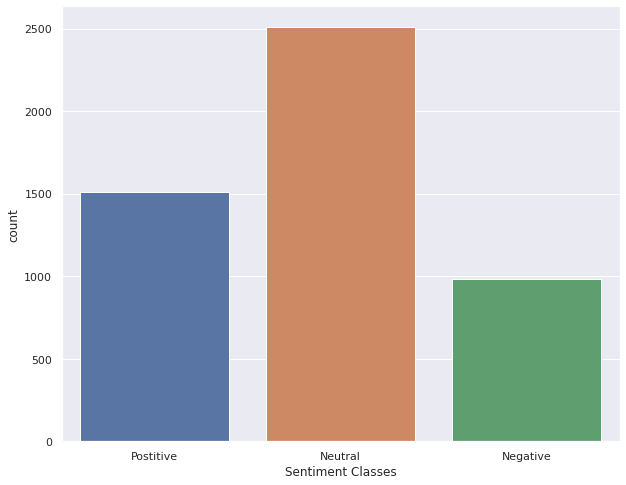

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})

sns.countplot(new_df['sentiments'])
plt.xlabel("Sentiment Classes")
plt.show()

In [25]:
new_df.sentiments

0       Postitive
1         Neutral
2       Postitive
3       Postitive
4        Negative
          ...    
4995     Negative
4996    Postitive
4997    Postitive
4998      Neutral
4999      Neutral
Name: sentiments, Length: 4998, dtype: object

In [26]:
new_df.sentiments = pd.factorize(new_df.sentiments)[0]
new_df

,Text,polarity,sentiments
0,pakistani armi extract from it own farmer farm...,0.600000,0
1,editor non stun export ban spark mass farmer p...,0.000000,1
2,pti kept islamabad hijack month attempt throw ...,0.285714,0
3,malik ishfaq langrial pass away punjab polic t...,0.285714,0
4,farmer postpon protest baton charg arrest â Â ...,-0.050000,2
...,...,...,...
4995,with farmer protest go Iâ influenc blog piec c...,-0.088068,2
4996,real note still load ppl donâ understand magni...,0.116667,0
4997,ye fact ate call peac farmer protest A khalist...,0.375000,0
4998,narendramodi pmoindia amitshah govâ creat host...,0.000000,1


In [27]:
main_data = new_df[['Text', 'sentiments']]

In [28]:
X = main_data['Text']
Y = main_data['sentiments']

In [29]:
X.reset_index()

,index,Text
0,0,pakistani armi extract from it own farmer farm...
1,1,editor non stun export ban spark mass farmer p...
2,2,pti kept islamabad hijack month attempt throw ...
3,3,malik ishfaq langrial pass away punjab polic t...
4,4,farmer postpon protest baton charg arrest â Â ...
...,...,...
4993,4995,with farmer protest go Iâ influenc blog piec c...
4994,4996,real note still load ppl donâ understand magni...
4995,4997,ye fact ate call peac farmer protest A khalist...
4996,4998,narendramodi pmoindia amitshah govâ creat host...


In [30]:
import numpy as np
X = np.array(X)
Y = np.array(Y)

In [31]:
X

array(['pakistani armi extract from it own farmer farmer protest then shower bulletsâ ann',
       'editor non stun export ban spark mass farmer protest across poland',
       'pti kept islamabad hijack month attempt throw democrat govern pml N canâ bear protest right group itâ administr use baton charg tear ga chemic laden water protest farmer kill ashfaq langriy',
       ...,
       'ye fact ate call peac farmer protest A khalistani agenda ð ð ð rich come',
       'narendramodi pmoindia amitshah govâ creat hostil environ know farmersprotest happi bill you abolish bill rather favor corpor util farmland everi indian citizen affect bill',
       'paji pleas share link sign complet lack peopl itâ import ð supportfam weunitedforfarm farmersprotest boycottjiomart boycottjiosaavn boycottjiorelianceproduct boycottkanganaranaut boycottambaniadani tractortwit tractortotwitt'],
      dtype=object)

In [32]:
Y

array([0, 1, 0, ..., 0, 1, 1])

In [33]:
print(len(X),len(Y))

4998 4998


In [34]:
# feature extracting
from sklearn.feature_extraction.text import TfidfVectorizer
# create object
tfidf = TfidfVectorizer()
  
# get tf-df values

result = tfidf.fit_transform(X)

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer()
# X=vectorizer.fit(X)

In [35]:
#splitting into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(result,Y, random_state=7, test_size=.15)

In [36]:
X_train.shape

(4248, 11404)

In [37]:
y_train.shape

(4248,)

In [38]:
X_test.shape

(750, 11404)

In [39]:

y_test.shape

(750,)

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [41]:
import warnings 
warnings.filterwarnings("ignore")

xgboost

In [ ]:
import xgboost as xgb
xg_model=xgb.XGBClassifier(learning_rate =.00001,max_depth=1000,random_state=0)
xg_model.fit(X_train, y_train)
xg_model.score(X_test,y_test)

0.8706666666666667

In [ ]:
y_pred = xg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       248
           1       0.86      0.99      0.92       357
           2       0.82      0.66      0.73       145

    accuracy                           0.87       750
   macro avg       0.86      0.82      0.84       750
weighted avg       0.87      0.87      0.87       750



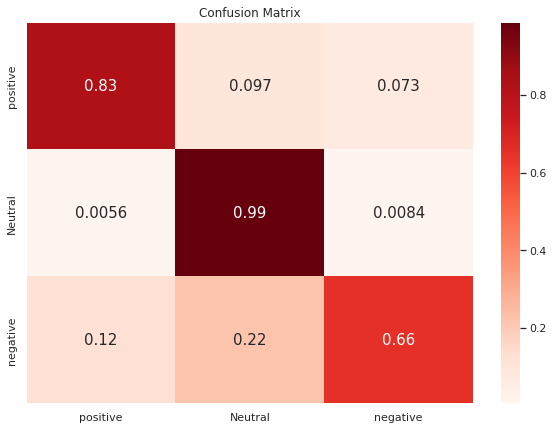

In [ ]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, np.around(y_pred, decimals=0))
conf_matrix = pd.DataFrame(matrix, index = ['positive','Neutral','negative'],columns = ['positive','Neutral','negative'])

#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, cmap=plt.cm.Reds,annot=True, annot_kws={"size": 15})
plt.title("Confusion Matrix")
plt.show()

In [ ]:
! pip install catboost

     |████████████████████████████████| 76.1 MB 38.4 MB/s 


catboost

In [ ]:
##import catboost
from catboost import CatBoostClassifier
ca_model=CatBoostClassifier(learning_rate=.04,depth=8,iterations=10000,random_strength=0.8) 
##fitting catboost
ca_model.fit(X_train,y_train)
##print score of test data
ca_model.score(X_test,y_test)

Streaming output truncated to the last 5000 lines.
5000:	learn: 0.1103711	total: 49m 40s	remaining: 49m 39s
5001:	learn: 0.1103656	total: 49m 41s	remaining: 49m 38s
5002:	learn: 0.1103481	total: 49m 41s	remaining: 49m 38s
5003:	learn: 0.1103382	total: 49m 42s	remaining: 49m 37s
5004:	learn: 0.1102973	total: 49m 42s	remaining: 49m 36s
5005:	learn: 0.1102883	total: 49m 43s	remaining: 49m 36s
5006:	learn: 0.1102464	total: 49m 43s	remaining: 49m 35s
5007:	learn: 0.1102048	total: 49m 44s	remaining: 49m 35s
5008:	learn: 0.1101811	total: 49m 45s	remaining: 49m 34s
5009:	learn: 0.1101595	total: 49m 45s	remaining: 49m 33s
5010:	learn: 0.1101542	total: 49m 46s	remaining: 49m 33s
5011:	learn: 0.1101316	total: 49m 46s	remaining: 49m 32s
5012:	learn: 0.1101224	total: 49m 47s	remaining: 49m 31s
5013:	learn: 0.1101117	total: 49m 47s	remaining: 49m 31s
5014:	learn: 0.1100909	total: 49m 48s	remaining: 49m 30s
5015:	learn: 0.1100320	total: 49m 49s	remaining: 49m 30s
5016:	learn: 0.1100198	total: 49m 49s

0.9333333333333333

In [ ]:
#predict model
Y_pred = ca_model.predict(X_test)
##print classification report 
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       248
           1       0.92      0.99      0.95       357
           2       0.93      0.85      0.89       145

    accuracy                           0.93       750
   macro avg       0.94      0.91      0.92       750
weighted avg       0.93      0.93      0.93       750



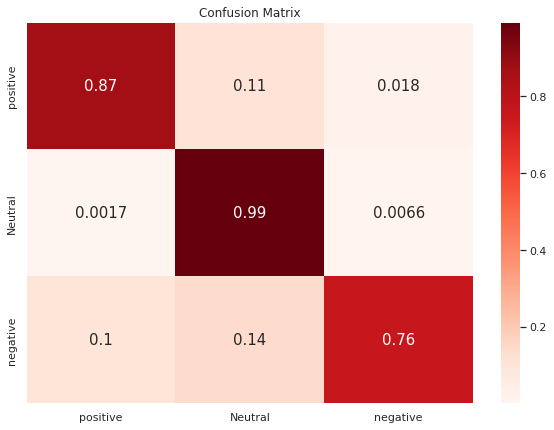

In [ ]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, np.around(Y_pred, decimals=0))
conf_matrix = pd.DataFrame(matrix, index = ['positive','Neutral','negative'],columns = ['positive','Neutral','negative'])

#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, cmap=plt.cm.Reds,annot=True, annot_kws={"size": 15})
plt.title("Confusion Matrix")
plt.show()

gradient boost

In [ ]:
##import Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=.1,max_depth=10)
##fiting gradientBoost 
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9128

voting classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = RandomForestClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators) 
voting.fit(X_train, y_train)
voting.score(X_test,y_test)

0.8456